In [13]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy.stats import random_correlation as rc

In [22]:
# Definition of parameters
m1 = 1.0
m2 = 0.1
m3 = 1.5
s1 = 0.75

#true values 
miu_true=0
sigma_true=1
data_length=1000

# initial toy data
obseved_data = np.random.normal(loc=miu_true, scale=sigma_true, size=data_length)

In [23]:
# simulator function
def scale_model(alpha, gamma):
    #Run SCALE with paramters
    #........................
    #........................
    #........................
    #........................
    #Toy output:
    SCALE_output=np.random.normal(alpha, gamma, data_length)    
    return SCALE_output

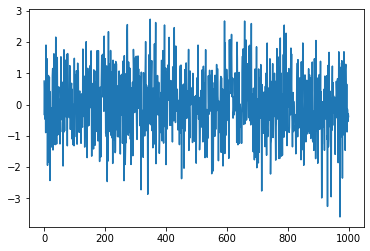

In [3]:
plt.plot(obseved_data)

(array([ 1.,  1.,  1.,  3.,  1.,  5.,  3.,  9., 18., 22., 27., 47., 52.,
        61., 78., 79., 92., 74., 82., 73., 53., 59., 46., 40., 22., 19.,
        15.,  7.,  2.,  8.]),
 array([-3.59878205, -3.38779484, -3.17680763, -2.96582041, -2.7548332 ,
        -2.54384599, -2.33285878, -2.12187157, -1.91088436, -1.69989715,
        -1.48890994, -1.27792273, -1.06693552, -0.85594831, -0.64496109,
        -0.43397388, -0.22298667, -0.01199946,  0.19898775,  0.40997496,
         0.62096217,  0.83194938,  1.04293659,  1.2539238 ,  1.46491102,
         1.67589823,  1.88688544,  2.09787265,  2.30885986,  2.51984707,
         2.73083428]),
 <a list of 30 Patch objects>)

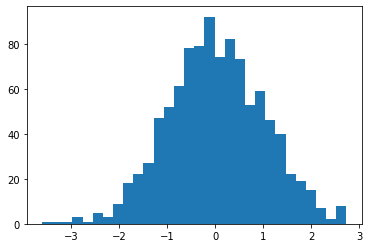

In [5]:
plt.hist(obseved_data, bins=30)

In [6]:
bay_scale_model = pm.Model()

with bay_scale_model:
    # Priors for scale model parameters
    alpha = pm.Normal("alpha", mu=m1, sd=s1)
    #beta = pm.Normal("beta", mu=m2, sd=s1, shape=2)
    gamma = pm.HalfNormal("gamma", sd=s1)
    #........................
    #........................
    #........................
    #........................
    #........................

In [6]:
with bay_scale_model:
    #Scale model parameters vector
    scale_params=(alpha, gamma)
    scale_sim = pm.Simulator("scale_sim", scale_model, params=scale_params, epsilon=10, observed=obseved_data)

In [7]:
#RUN ABC MODEL for BAY_SCALE 
with bay_scale_model:
    trace, sim_data = pm.sample_smc(kernel="ABC", parallel=False, save_sim_data=True)
    idata = az.from_pymc3(trace, posterior_predictive=sim_data)

Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.218
Stage:   1 Beta: 0.870
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.220
Stage:   1 Beta: 0.895
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.209
Stage:   1 Beta: 0.871
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.214
Stage:   1 Beta: 0.894
Stage:   2 Beta: 1.000


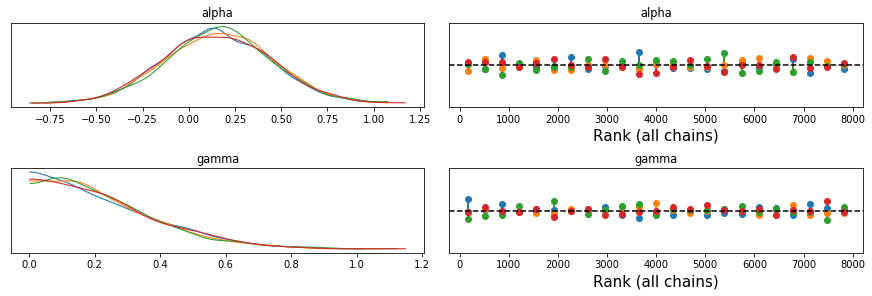

C:\Users\KopkaP\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


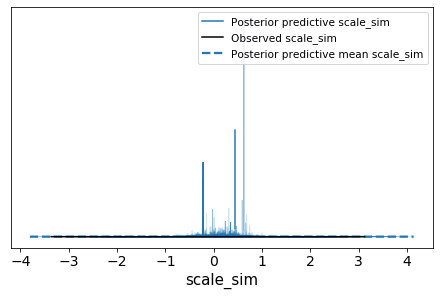

In [8]:
#Results summary and plots
az.plot_trace(idata, kind="rank_vlines");
az.summary(idata, kind="stats")
az.plot_ppc(idata);